# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [412]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [413]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,158.5
1,1,Washington,California,692.8
2,1,California,Oregon,536.1
3,1,California,Nevada,132.2
4,1,California,Arizona,755.8
5,1,California,Texas,1764.5
6,1,California,Indiana,2199.3
7,1,Arizona,Texas,1010.7
8,1,Texas,Louisiana,426.6
9,1,Texas,Florida,869.3


Graph with 29 nodes and 36 edges


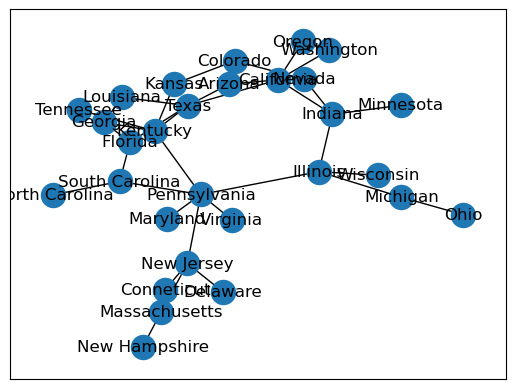

In [414]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [415]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [416]:
#function to calculate entropic degree per node
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [417]:
#function to calculate demand adjusted entropic degree per node
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [418]:
#function to calculate closeness centrality per node
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [419]:
#function to calculate shortest path per node from the production center
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df3 = df3[df3.Shortest_path_to_production_facility != 0]
    return df3

In [420]:
#function to calculate shortest path  per node from the production center, adjusted by warehouse size
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4

In [421]:
#function to calculate average distance per product
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [422]:
#function to calculate the costs to distribute per warehouse
def cost_function(graph, location, weight, demand):
    df4 = pd.DataFrame(columns=['State', 'Shortest_path_to_production_facility', 'Warehouse_size', 'Total_distance', 'Trucks_Needed','Shortest_Path_Times_Trucks_Needed','Each_truck_costs_for_miles','Each_truck_costs_for_driver','Combined_costs_truck','Combined_costs_total_trucks'])
    b = nx.shortest_path_length(graph, location, weight=weight)
    for i in b:
        shortest_path_length = b[i]
        if shortest_path_length > 0:
            # Compute the other statistics as before
            warehouse_size = Mississippi_Graph.nodes[i][demand]
            total_distance = shortest_path_length * warehouse_size
            load_per_route_truck = 169030
            trucks_needed = math.ceil(warehouse_size/load_per_route_truck)
            Shortest_Path_Times_Trucks_Needed = shortest_path_length*trucks_needed
            Each_truck_costs_for_miles = shortest_path_length*2.74
            Each_truck_costs_for_driver = 310 * (shortest_path_length / 650)
            Combined_costs_truck = Each_truck_costs_for_miles + Each_truck_costs_for_driver
            Combined_costs_total_trucks = Combined_costs_truck*trucks_needed
        else:
            # Handle the case where the shortest path length is zero or very small
            warehouse_size = 0
            total_distance = 0
            load_per_route_truck = 0
            trucks_needed = 0
            Shortest_Path_Times_Trucks_Needed = 0
            Each_truck_costs_for_miles = 0
            Each_truck_costs_for_driver = 0
            Combined_costs_truck = 0
            Combined_costs_total_trucks = 0
        new_row = {'State': i, 'Shortest_path_to_production_facility': shortest_path_length, 'Warehouse_size': warehouse_size, 'Total_distance': total_distance, 'Trucks_Needed': trucks_needed, 'Shortest_Path_Times_Trucks_Needed': Shortest_Path_Times_Trucks_Needed, 'Each_truck_costs_for_miles': Each_truck_costs_for_miles, 'Each_truck_costs_for_driver': Each_truck_costs_for_driver, 'Combined_costs_truck': Combined_costs_truck, 'Combined_costs_total_trucks': Combined_costs_total_trucks}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4

In [423]:
#function to give the combined costs
def cost_function2(graph, location, weight, demand):
    df4 = pd.DataFrame(columns=['State', 'Shortest_path_to_production_facility', 'Warehouse_size', 'Total_distance', 'Trucks_Needed','Shortest_Path_Times_Trucks_Needed','Each_truck_costs_for_miles','Each_truck_costs_for_driver','Combined_costs_truck','Combined_costs_total_trucks'])
    b = nx.shortest_path_length(graph, location, weight=weight)
    for i in b:
        shortest_path_length = b[i]
        if shortest_path_length > 0:
            # Compute the other statistics as before
            warehouse_size = Mississippi_Graph.nodes[i][demand]
            total_distance = shortest_path_length * warehouse_size
            load_per_route_truck = 169030
            trucks_needed = math.ceil(warehouse_size/load_per_route_truck)
            Shortest_Path_Times_Trucks_Needed = shortest_path_length*trucks_needed
            Each_truck_costs_for_miles = shortest_path_length*2.74
            Each_truck_costs_for_driver = 310 * (shortest_path_length / 650)
            Combined_costs_truck = Each_truck_costs_for_miles + Each_truck_costs_for_driver
            Combined_costs_total_trucks = Combined_costs_truck*trucks_needed
        else:
            # Handle the case where the shortest path length is zero or very small
            warehouse_size = 0
            total_distance = 0
            load_per_route_truck = 0
            trucks_needed = 0
            Shortest_Path_Times_Trucks_Needed = 0
            Each_truck_costs_for_miles = 0
            Each_truck_costs_for_driver = 0
            Combined_costs_truck = 0
            Combined_costs_total_trucks = 0
        new_row = {'State': i, 'Shortest_path_to_production_facility': shortest_path_length, 'Warehouse_size': warehouse_size, 'Total_distance': total_distance, 'Trucks_Needed': trucks_needed, 'Shortest_Path_Times_Trucks_Needed': Shortest_Path_Times_Trucks_Needed, 'Each_truck_costs_for_miles': Each_truck_costs_for_miles, 'Each_truck_costs_for_driver': Each_truck_costs_for_driver, 'Combined_costs_truck': Combined_costs_truck, 'Combined_costs_total_trucks': Combined_costs_total_trucks}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4['Combined_costs_total_trucks'].sum()

In [425]:
#function to calculate the average shortest path
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [426]:
#function to calculate betweenness centrality per node in the graph
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [427]:
#function to call upon all functions used
def metrics_graph(graph, graph2,weight,demand,location):
    c = closeness_centrality(graph2,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph2, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    j = cost_function2(graph, location, weight, demand)
    k = cost_function(graph, location, weight, demand)

    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    print('Trucks required:')
    display(k)
    print('Price trucks:')
    display(j)

    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)

    
    import warnings
    warnings.filterwarnings("ignore")

In [428]:
#metrics of initial graph+criteria
metrics_graph(graph=Mississippi_Graph,graph2=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000802
9,Kentucky,0.000760
18,New Jersey,0.000750
16,Maryland,0.000740
20,Delaware,0.000694
17,Virginia,0.000685
19,Conneticut,0.000661
25,Illinois,0.000661
10,Tennessee,0.000660
12,South Carolina,0.000648


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3049.5
27,Washington,2883.9
26,Ohio,2881.8
25,Oregon,2727.2
24,Michigan,2638.2
23,Wisconsin,2521.3
22,Indiana,2462.0
21,Nevada,2323.3
20,Illinois,2247.6
19,California,2191.1


Average shortest path to production center:


1838.1642857142856

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.597884
9,Kentucky,0.396825
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.166667
6,Indiana,0.124339
23,Colorado,0.121693
12,South Carolina,0.108466
3,Nevada,0.100529


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6491.500953
5,Texas,5021.068206
6,Indiana,4179.330607
9,Kentucky,2604.061379
14,Pennsylvania,2297.247309
3,Nevada,2296.005159
25,Illinois,1414.136839
8,Florida,1252.626795
7,Louisiana,1239.997071
4,Arizona,1218.655923


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3049.5,820000,2500590000.0
27,Washington,2883.9,2280000,6575291999.999999
26,Ohio,2881.8,1855000,5345738999.999999
25,Oregon,2727.2,855000,2331756000.0
24,Michigan,2638.2,1000000,2638200000.0
23,Wisconsin,2521.3,1100000,2773430000.0
22,Indiana,2462.0,5450000,13417900000.0
21,Nevada,2323.3,2150000,4995094999.999999
20,Illinois,2247.6,6012000,13512571200.0
19,California,2191.1,14123800,30946658180.0


Total distance per product=


1691.194976605738

Entropic degree:


,Entropic_Degree
California,10123.387810
Texas,8534.296845
Indiana,7537.115612
Kentucky,4722.207597
Nevada,4402.694456
Pennsylvania,3937.013384
Illinois,2524.703348
Arizona,2290.254599
Florida,2282.067398
Colorado,2063.480468


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Minnesota,3049.5,820000,2500590000.0,5,15247.5,8355.63,1454.376923,9810.006923,49050.034615
27,Washington,2883.9,2280000,6575291999.999999,14,40374.6,7901.886,1375.398462,9277.284462,129881.982462
26,Ohio,2881.8,1855000,5345738999.999999,11,31699.8,7896.132,1374.396923,9270.528923,101975.818154
25,Oregon,2727.2,855000,2331756000.0,6,16363.2,7472.528,1300.664615,8773.192615,52639.155692
24,Michigan,2638.2,1000000,2638200000.0,6,15829.2,7228.668,1258.218462,8486.886462,50921.318769
23,Wisconsin,2521.3,1100000,2773430000.0,7,17649.1,6908.362,1202.466154,8110.828154,56775.797077
22,Indiana,2462.0,5450000,13417900000.0,33,81246.0,6745.88,1174.184615,7920.064615,261362.132308
21,Nevada,2323.3,2150000,4995094999.999999,13,30202.9,6365.842,1108.035385,7473.877385,97160.406
20,Illinois,2247.6,6012000,13512571200.0,36,80913.6,6158.424,1071.932308,7230.356308,260292.827077
19,California,2191.1,14123800,30946658180.0,84,184052.4,6003.614,1044.986154,7048.600154,592082.412923


Price trucks:


3283427.8144615386

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000802,0.597884,2297.247309,1.101543
1,Kentucky,0.000760,0.396825,2604.061379,0.785697
25,California,0.000418,0.174603,6491.500953,0.473580
13,Indiana,0.000614,0.124339,4179.330607,0.319097
7,Illinois,0.000661,0.298942,1414.136839,0.279288
20,Texas,0.000535,0.089947,5021.068206,0.241477
2,New Jersey,0.000750,0.267196,581.448415,0.116575
24,Nevada,0.000426,0.100529,2296.005159,0.098351
15,Kansas,0.000593,0.166667,791.831265,0.078249
9,South Carolina,0.000648,0.108466,944.682286,0.066394


# PART 1 INIITIAL NETWORK WITH PENNSYLVANIA


In [429]:
#criteria of initial graph with pennsylvania as production node
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
metrics_graph(graph=Mississippi_Graph,graph2=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Pennsylvania')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000802
9,Kentucky,0.000760
18,New Jersey,0.000750
16,Maryland,0.000740
20,Delaware,0.000694
17,Virginia,0.000685
19,Conneticut,0.000661
25,Illinois,0.000661
10,Tennessee,0.000660
12,South Carolina,0.000648


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,3625.8
27,Oregon,3469.1
26,California,2933.0
25,Nevada,2800.8
24,Arizona,2642.0
23,Colorado,1731.0
22,Texas,1631.3
21,Minnesota,1552.2
20,Louisiana,1497.3
19,Ohio,1384.5


Average shortest path to production center:


1246.875

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.597884
9,Kentucky,0.396825
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.166667
6,Indiana,0.124339
23,Colorado,0.121693
12,South Carolina,0.108466
3,Nevada,0.100529


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6491.500953
5,Texas,5021.068206
6,Indiana,4179.330607
14,Pennsylvania,3937.013384
9,Kentucky,2604.061379
3,Nevada,2296.005159
25,Illinois,1414.136839
8,Florida,1252.626795
4,Arizona,1218.655923
23,Colorado,1052.375039


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,3625.8,2280000,8266824000.0
27,Oregon,3469.1,855000,2966080500.0
26,California,2933.0,14123800,41425105400.0
25,Nevada,2800.8,2150000,6021720000.0
24,Arizona,2642.0,3210500,8482141000.0
23,Colorado,1731.0,1000000,1731000000.0
22,Texas,1631.3,8834000,14410904200.000002
21,Minnesota,1552.2,820000,1272804000.0
20,Louisiana,1497.3,8350000,12502455000.0
19,Ohio,1384.5,1855000,2568247500.0


Total distance per product=


1339.9116629467076

Entropic degree:


,Entropic_Degree
California,10123.387810
Texas,8534.296845
Indiana,7537.115612
Kentucky,4722.207597
Nevada,4402.694456
Pennsylvania,3937.013384
Illinois,2524.703348
Arizona,2290.254599
Florida,2282.067398
Colorado,2063.480468


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,3625.8,2280000,8266824000.0,14,50761.2,9934.692,1729.227692,11663.919692,163294.875692
27,Oregon,3469.1,855000,2966080500.0,6,20814.6,9505.334,1654.493846,11159.827846,66958.967077
26,California,2933.0,14123800,41425105400.0,84,246372.0,8036.42,1398.815385,9435.235385,792559.772308
25,Nevada,2800.8,2150000,6021720000.0,13,36410.4,7674.192,1335.766154,9009.958154,117129.456
24,Arizona,2642.0,3210500,8482141000.0,19,50198.0,7239.08,1260.030769,8499.110769,161483.104615
23,Colorado,1731.0,1000000,1731000000.0,6,10386.0,4742.94,825.553846,5568.493846,33410.963077
22,Texas,1631.3,8834000,14410904200.000002,53,86458.9,4469.762,778.004615,5247.766615,278131.630615
21,Minnesota,1552.2,820000,1272804000.0,5,7761.0,4253.028,740.28,4993.308,24966.54
20,Louisiana,1497.3,8350000,12502455000.0,50,74865.0,4102.602,714.096923,4816.698923,240834.946154
19,Ohio,1384.5,1855000,2568247500.0,11,15229.5,3793.53,660.3,4453.83,48992.13


Price trucks:


2598138.593999999

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000802,0.597884,3937.013384,1.887820
1,Kentucky,0.000760,0.396825,2604.061379,0.785697
25,California,0.000418,0.174603,6491.500953,0.473580
13,Indiana,0.000614,0.124339,4179.330607,0.319097
7,Illinois,0.000661,0.298942,1414.136839,0.279288
20,Texas,0.000535,0.089947,5021.068206,0.241477
2,New Jersey,0.000750,0.267196,581.448415,0.116575
24,Nevada,0.000426,0.100529,2296.005159,0.098351
15,Kansas,0.000593,0.166667,791.831265,0.078249
9,South Carolina,0.000648,0.108466,944.682286,0.066394


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

Graph with 29 nodes and 28 edges


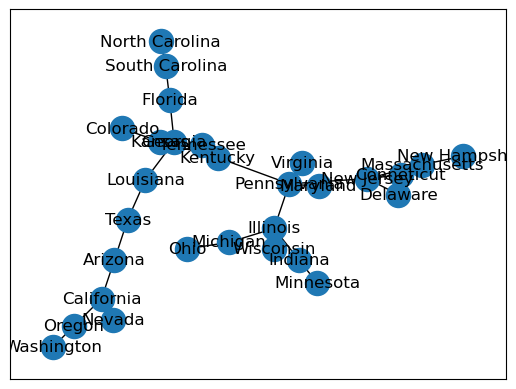

In [430]:
#create minimal spanning tree
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
a = nx.minimum_spanning_tree(Mississippi_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [431]:
# Read in the excel file 'distance_state_louisiana_4.xlsx' as a dataframe
directed1 = pd.read_excel('distance_state_louisiana_4.xlsx')
# Show contents of the dataframe
directed1

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Georgia,Kentucky,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


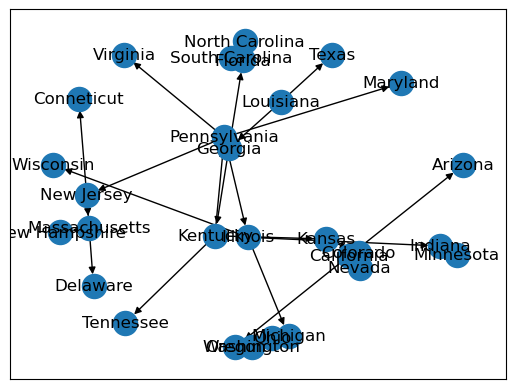

In [432]:
#make a directed graph
Directed_Graph1= nx.from_pandas_edgelist(directed1, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph1,with_labels=True)
print(Directed_Graph1)

In [433]:
#metrics+criteria for minimal spanning tree
metrics_graph(graph=Directed_Graph1,graph2=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000688
14,Pennsylvania,0.000678
11,Georgia,0.000643
18,New Jersey,0.000641
16,Maryland,0.000634
10,Tennessee,0.000604
20,Delaware,0.000599
17,Virginia,0.000593
19,Conneticut,0.000575
8,Florida,0.000561


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.656085
9,Kentucky,0.611111
11,Georgia,0.531746
7,Louisiana,0.349206
25,Illinois,0.325397
5,Texas,0.304233
18,New Jersey,0.267196
4,Arizona,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
24,Louisiana,1244.380678
3,Kentucky,1105.655133
0,California,1071.844388
9,Pennsylvania,1030.531892
18,Illinois,706.745746
28,Colorado,504.900000
5,Georgia,442.991411
12,New Jersey,432.323032
16,Indiana,322.719000
8,Kansas,281.448000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3969,3210500,12742474500
27,Washington,3910,2280000,8914800000
26,Oregon,3750,855000,3206250000
25,California,3214,14123800,45393893200
24,Nevada,3084,2150000,6630600000
23,Minnesota,3034,820000,2487880000
22,Ohio,2889,1855000,5359095000
21,Michigan,2635,1000000,2635000000
20,Wisconsin,2508,1100000,2758800000
19,Indiana,2452,5450000,13363400000


Total distance per product=


1958.9993043193174

Entropic degree:


,Entropic_Degree
Kentucky,2004.996160
Pennsylvania,1766.121494
California,1671.523503
Illinois,1261.775594
Louisiana,1244.380678
Colorado,990.000000
Georgia,862.102580
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Arizona,3969,3210500,12742474500,19,75411,10875.06,1892.907692,12767.967692,242591.386154
27,Washington,3910,2280000,8914800000,14,54740,10713.4,1864.769231,12578.169231,176094.369231
26,Oregon,3750,855000,3206250000,6,22500,10275.0,1788.461538,12063.461538,72380.769231
25,California,3214,14123800,45393893200,84,269976,8806.36,1532.830769,10339.190769,868492.024615
24,Nevada,3084,2150000,6630600000,13,40092,8450.16,1470.830769,9920.990769,128972.88
23,Minnesota,3034,820000,2487880000,5,15170,8313.16,1446.984615,9760.144615,48800.723077
22,Ohio,2889,1855000,5359095000,11,31779,7915.86,1377.830769,9293.690769,102230.598462
21,Michigan,2635,1000000,2635000000,6,15810,7219.9,1256.692308,8476.592308,50859.553846
20,Wisconsin,2508,1100000,2758800000,7,17556,6871.92,1196.123077,8068.043077,56476.301538
19,Indiana,2452,5450000,13363400000,33,80916,6718.48,1169.415385,7887.895385,260300.547692


Price trucks:


3799926.0461538457

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Kentucky,0.000688,0.611111,1105.655133,0.464752
1,Pennsylvania,0.000678,0.656085,1030.531892,0.458716
11,Louisiana,0.000544,0.349206,1244.380678,0.236357
2,Georgia,0.000643,0.531746,442.991411,0.151436
13,Illinois,0.000518,0.325397,706.745746,0.119190
3,New Jersey,0.000641,0.267196,432.323032,0.074059
25,California,0.000298,0.203704,1071.844388,0.065172
9,Florida,0.000561,0.137566,194.859500,0.015038
16,Indiana,0.000471,0.071429,322.719000,0.010869
14,Kansas,0.000497,0.071429,281.448000,0.009999


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE KENTUCKY

In [434]:
#criteria for minimal spanning tree with Kentucky as production node
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 50000000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 5145000
metrics_graph(graph=a,graph2=a,weight='Distance',demand='warehouse size',location='Kentucky')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000688
14,Pennsylvania,0.000678
11,Georgia,0.000643
18,New Jersey,0.000641
16,Maryland,0.000634
10,Tennessee,0.000604
20,Delaware,0.000599
17,Virginia,0.000593
19,Conneticut,0.000575
8,Florida,0.000561


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,3822.6
27,Oregon,3664.1
26,Nevada,3260.2
25,California,3128.0
24,Arizona,2372.2
23,Minnesota,2114.6
22,Ohio,1946.9
21,Michigan,1703.3
20,Wisconsin,1586.4
19,Indiana,1527.1


Average shortest path to production center:


1453.8464285714285

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.656085
9,Kentucky,0.611111
11,Georgia,0.531746
7,Louisiana,0.349206
25,Illinois,0.325397
5,Texas,0.304233
18,New Jersey,0.267196
4,Arizona,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
9,Kentucky,2830.407044
14,Pennsylvania,1635.827956
25,Illinois,1414.136839
2,California,1279.899253
4,Arizona,1218.655923
5,Texas,1068.957473
11,Georgia,910.447862
13,Kansas,791.831265
7,Louisiana,683.796385
18,New Jersey,581.448415


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,3822.6,2280000,8715528000.0
27,Oregon,3664.1,855000,3132805500.0
26,Nevada,3260.2,2150000,7009430000.0
25,California,3128.0,14123800,44179246400.0
24,Arizona,2372.2,3210500,7615948099.999999
23,Minnesota,2114.6,820000,1733972000.0
22,Ohio,1946.9,1855000,3611499500.0
21,Michigan,1703.3,1000000,1703300000.0
20,Wisconsin,1586.4,1100000,1745040000.0
19,Indiana,1527.1,5450000,8322694999.999999


Total distance per product=


1465.904979614357

Entropic degree:


,Entropic_Degree
Kentucky,2830.407044
Pennsylvania,2803.475502
Illinois,2524.703348
Arizona,2290.254599
California,1995.981605
Texas,1816.904296
Georgia,1771.816410
Kansas,1519.246480
Louisiana,1239.997071
New Jersey,1112.606994


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,3822.6,2280000,8715528000.0,14,53516.4,10473.924,1823.086154,12297.010154,172158.142154
27,Oregon,3664.1,855000,3132805500.0,6,21984.6,10039.634,1747.493846,11787.127846,70722.767077
26,Nevada,3260.2,2150000,7009430000.0,13,42382.6,8932.948,1554.864615,10487.812615,136341.564
25,California,3128.0,14123800,44179246400.0,84,262752.0,8570.72,1491.815385,10062.535385,845252.972308
24,Arizona,2372.2,3210500,7615948099.999999,19,45071.8,6499.828,1131.356923,7631.184923,144992.513538
23,Minnesota,2114.6,820000,1733972000.0,5,10573.0,5794.004,1008.501538,6802.505538,34012.527692
22,Ohio,1946.9,1855000,3611499500.0,11,21415.9,5334.506,928.521538,6263.027538,68893.302923
21,Michigan,1703.3,1000000,1703300000.0,6,10219.8,4667.042,812.343077,5479.385077,32876.310462
20,Wisconsin,1586.4,1100000,1745040000.0,7,11104.8,4346.736,756.590769,5103.326769,35723.287385
19,Indiana,1527.1,5450000,8322694999.999999,33,50394.3,4184.254,728.309231,4912.563231,162114.586615


Price trucks:


2844686.473846154

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Kentucky,0.000688,0.611111,2830.407044,1.189736
1,Pennsylvania,0.000678,0.656085,1635.827956,0.728149
2,Georgia,0.000643,0.531746,910.447862,0.311236
13,Illinois,0.000518,0.325397,1414.136839,0.238488
15,Texas,0.000477,0.304233,1068.957473,0.155046
11,Louisiana,0.000544,0.349206,683.796385,0.129880
24,Arizona,0.000359,0.253968,1218.655923,0.111197
3,New Jersey,0.000641,0.267196,581.448415,0.099605
25,California,0.000298,0.203704,1279.899253,0.077822
9,Florida,0.000561,0.137566,513.423141,0.039623


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [435]:
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
#network where all stats are connected to each other
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [436]:
#format the dataset like the previous ones
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [437]:
huge_network2 = huge_network.copy()

In [438]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [439]:
#change name Connecticut into Conneticut
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [440]:
#change name Connecticut into Conneticut
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [441]:
huge_network2 = huge_network.copy()

In [442]:
#remove nodes not used in the initial network
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == huge_network.iloc[i,0]:
        l2.append(i)

In [443]:
#remove double links
c = list(Mississippi_Graph.nodes)
l3 = []
l4 = []
for j in c:
        for i in range(len(huge_network)):
            if huge_network.iloc[i,0] not in l3:
                if huge_network.iloc[i,1] == j:
                    l4.append(i)
        l3.append(j)

In [444]:
joinedlist = l2 + l4

In [445]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

In [446]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

Graph with 29 nodes and 406 edges


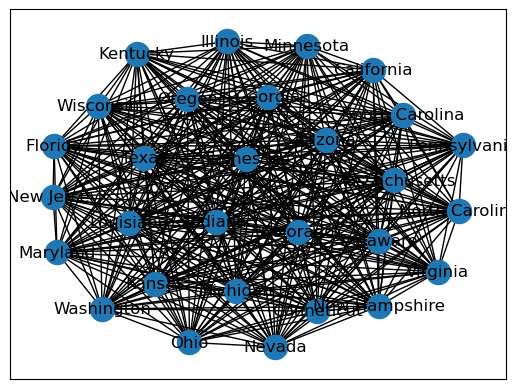

In [447]:
#create the graph
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

Graph with 29 nodes and 28 edges


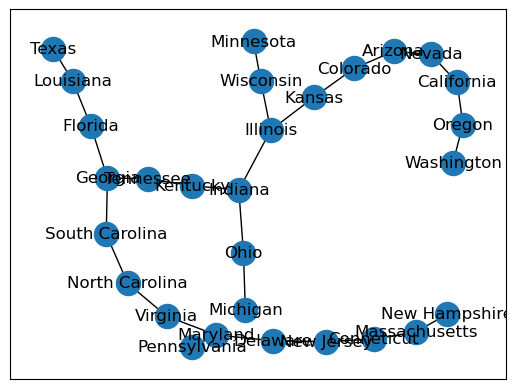

In [448]:
#make a minimal spanning tree of that graph
a = nx.minimum_spanning_tree(Huge_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [449]:
# Read in the excel file 'mississippi.xlsx' as a dataframe. Contains directed graph based on the connections in the minimal spanning tree made earlier
minimal_huge_graph = pd.read_excel('distance_state_minimal_network_louisiana_2.xlsx')
# Show contents of the dataframe
minimal_huge_graph

,weight,0,b,Distance
0,1,Oregon,Washington,160
1,1,California,Oregon,536
2,1,Nevada,California,130
3,1,Arizona,Nevada,740
4,1,Colorado,Arizona,819
5,1,Kansas,Colorado,540
6,1,Illinois,Kansas,373
7,1,Illinois,Wisconsin,264
8,1,Wisconsin,Minnesota,251
9,1,Indiana,Illinois,208


DiGraph with 29 nodes and 28 edges


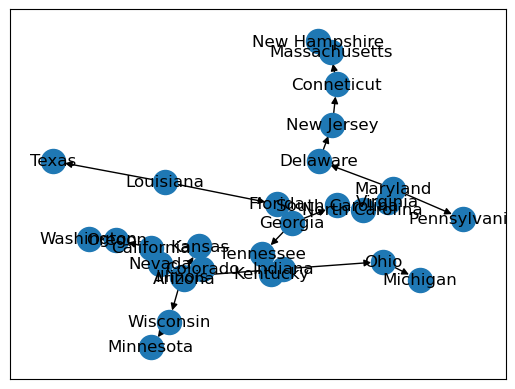

In [450]:
Directed_Minimal_Huge_Graph= nx.from_pandas_edgelist(minimal_huge_graph, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Minimal_Huge_Graph,with_labels=True)
print(Directed_Minimal_Huge_Graph)

In [451]:
#metrics+criteria for minimal spanning tree of the huge network with production node in Louisiana
metrics_graph(graph=Directed_Minimal_Huge_Graph,graph2=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000755
12,Kentucky,0.000750
2,Georgia,0.000750
15,Indiana,0.000740
7,South Carolina,0.000713
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000661
26,Florida,0.000641
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4835
27,Oregon,4675
26,California,4139
25,Nevada,4009
24,Arizona,3269
23,Colorado,2450
22,Minnesota,2052
21,New Hampshire,1999
20,Massachusetts,1931
19,Kansas,1910


Average shortest path to production center:


1942.0

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
17,Louisiana,1140.961460
7,Illinois,461.923115
5,Colorado,417.690000
4,Arizona,393.757700
2,California,343.703568
15,Georgia,309.299593
10,Indiana,281.883063
6,Kansas,281.448000
16,Florida,143.262900
11,Ohio,131.711700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4835,2280000,11023800000
27,Oregon,4675,855000,3997125000
26,California,4139,14123800,58458408200
25,Nevada,4009,2150000,8619350000
24,Arizona,3269,3210500,10495124500
23,Colorado,2450,1000000,2450000000
22,Minnesota,2052,820000,1682640000
21,New Hampshire,1999,63800,127536200
20,Massachusetts,1931,1000000,1931000000
19,Kansas,1910,2120000,4049200000


Total distance per product=


1955.8376775060246

Entropic degree:


,Entropic_Degree
Louisiana,1140.961460
Illinois,824.685987
Colorado,819.000000
Arizona,740.000000
Georgia,601.925841
Kansas,540.000000
California,536.000000
Indiana,508.355389
Florida,261.000000
Ohio,254.000000


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,4835,2280000,11023800000,14,67690,13247.9,2305.923077,15553.823077,217753.523077
27,Oregon,4675,855000,3997125000,6,28050,12809.5,2229.615385,15039.115385,90234.692308
26,California,4139,14123800,58458408200,84,347676,11340.86,1973.984615,13314.844615,1118446.947692
25,Nevada,4009,2150000,8619350000,13,52117,10984.66,1911.984615,12896.644615,167656.38
24,Arizona,3269,3210500,10495124500,19,62111,8957.06,1559.061538,10516.121538,199806.309231
23,Colorado,2450,1000000,2450000000,6,14700,6713.0,1168.461538,7881.461538,47288.769231
22,Minnesota,2052,820000,1682640000,5,10260,5622.48,978.646154,6601.126154,33005.630769
21,New Hampshire,1999,63800,127536200,1,1999,5477.26,953.369231,6430.629231,6430.629231
20,Massachusetts,1931,1000000,1931000000,6,11586,5290.94,920.938462,6211.878462,37271.270769
19,Kansas,1910,2120000,4049200000,13,24830,5233.4,910.923077,6144.323077,79876.2


Price trucks:


3795036.3230769243

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
5,Illinois,0.000704,0.489418,461.923115,0.159252
2,Georgia,0.000750,0.595238,309.299593,0.137995
3,Indiana,0.000740,0.560847,281.883063,0.117047
19,Colorado,0.000513,0.304233,417.690000,0.065152
10,Kansas,0.000618,0.349206,281.448000,0.060691
0,Tennessee,0.000755,0.518519,112.728000,0.044103
20,Louisiana,0.000511,0.071429,1140.961460,0.041615
24,Arizona,0.000399,0.253968,393.757700,0.039903
4,South Carolina,0.000713,0.452381,118.811800,0.038301
1,Kentucky,0.000750,0.515873,91.540700,0.035432


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE ILLINOIS

In [452]:
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 50000000

In [453]:
#criteria for minimal spanning tree of huge network with production node in Illinois
metrics_graph(graph=a,graph2=a,weight='Distance',demand='warehouse size',location='Illinois')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000755
12,Kentucky,0.000750
2,Georgia,0.000750
15,Indiana,0.000740
7,South Carolina,0.000713
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000661
26,Florida,0.000641
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,3303.4
27,Oregon,3144.9
26,California,2608.8
25,Nevada,2476.6
24,New Hampshire,2132.7
23,Massachusetts,2063.5
22,Texas,1984.2
21,Conneticut,1961.9
20,New Jersey,1774.8
19,Arizona,1737.1


Average shortest path to production center:


1419.5928571428574

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
25,Illinois,1262.330546
19,Arizona,1078.388638
10,Colorado,898.991640
4,Louisiana,634.971630
27,Kansas,618.951777
2,Georgia,559.376224
6,Nevada,538.611131
22,California,521.103954
26,Florida,510.304084
15,Indiana,461.127892


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,3303.4,2280000,7531751999.999999
27,Oregon,3144.9,855000,2688889500.0
26,California,2608.8,14123800,36846169439.999992
25,Nevada,2476.6,2150000,5324690000.0
24,New Hampshire,2132.7,63800,136066260.0
23,Massachusetts,2063.5,1000000,2063500000.0
22,Texas,1984.2,8834000,17528422800.0
21,Conneticut,1961.9,14123800,27709483220.0
20,New Jersey,1774.8,2260000,4011048000.0
19,Arizona,1737.1,3210500,5576959550.0


Total distance per product=


1602.8258490352928

Entropic degree:


,Entropic_Degree
Arizona,2026.646316
Colorado,1762.728705
Illinois,1262.330546
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1088.598275
Nevada,1032.811373
Florida,929.684976
Oregon,856.615661
Indiana,831.610264


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,3303.4,2280000,7531751999.999999,14,46247.6,9051.316,1575.467692,10626.783692,148774.971692
27,Oregon,3144.9,855000,2688889500.0,6,18869.4,8617.026,1499.875385,10116.901385,60701.408308
26,California,2608.8,14123800,36846169439.999992,84,219139.2,7148.112,1244.196923,8392.308923,704953.949538
25,Nevada,2476.6,2150000,5324690000.0,13,32195.8,6785.884,1181.147692,7967.031692,103571.412
24,New Hampshire,2132.7,63800,136066260.0,1,2132.7,5843.598,1017.133846,6860.731846,6860.731846
23,Massachusetts,2063.5,1000000,2063500000.0,6,12381.0,5653.99,984.130769,6638.120769,39828.724615
22,Texas,1984.2,8834000,17528422800.0,53,105162.6,5436.708,946.310769,6383.018769,338299.994769
21,Conneticut,1961.9,14123800,27709483220.0,84,164799.6,5375.606,935.675385,6311.281385,530147.636308
20,New Jersey,1774.8,2260000,4011048000.0,14,24847.2,4862.952,846.443077,5709.395077,79931.531077
19,Arizona,1737.1,3210500,5576959550.0,19,33004.9,4759.654,828.463077,5588.117077,106174.224462


Price trucks:


3107390.706461537

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
5,Illinois,0.000704,0.489418,1262.330546,0.435200
2,Georgia,0.000750,0.595238,559.376224,0.249567
3,Indiana,0.000740,0.560847,461.127892,0.191476
19,Colorado,0.000513,0.304233,898.991640,0.140227
10,Kansas,0.000618,0.349206,618.951777,0.133469
0,Tennessee,0.000755,0.518519,317.466374,0.124203
24,Arizona,0.000399,0.253968,1078.388638,0.109283
1,Kentucky,0.000750,0.515873,268.778700,0.104034
4,South Carolina,0.000713,0.452381,300.272899,0.096799
6,North Carolina,0.000670,0.423280,262.705272,0.074527


# PART 2 CLUSTER CODE

In [454]:
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000


In [455]:
# Read in the excel file 'us-state-capitals.xlsx' as a dataframe to get latitude and longitude per state
locations = pd.read_csv('us-state-capitals.csv')
# Show contents of the dataframe
locations

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [456]:
#reformat the dataset
locations.rename(columns={"name":"0"},inplace=True)
locations.drop(locations.columns[[1]], axis=1, inplace=True)
locations

,0,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


In [457]:
#change names
for i in range(len(locations)):        
    if locations.iloc[i,0] == 'Connecticut':
        locations.iloc[i,0] = 'Conneticut'

In [458]:
#remove nodes not used in initial graph
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(locations)):
    if locations.iloc[i,0] not in c:
        l2.append(i)

In [459]:
locations.drop(locations.index[l2], inplace=True)
a = locations.pop('0')
locations

,latitude,longitude
2,33.448143,-112.096962
4,38.576668,-121.493629
5,39.739227,-104.984856
6,41.764046,-72.682198
7,39.157307,-75.519722
9,30.438118,-84.281296
10,33.749027,-84.388229
12,39.798363,-89.654961
13,39.768623,-86.162643
15,39.048191,-95.677956


In [460]:
#use kmeans clustering and set equal size for clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np

def get_even_clusters(X, cluster_size):
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    return clusters

In [461]:
b  = get_even_clusters(locations, 10)

In [462]:
#do the same but now get the centroids of these clusters
def get_even_clusters2(X, cluster_size):
    global centroids
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    return centroids

In [463]:
c  = get_even_clusters2(locations, 10)

In [464]:
centroids

array([[  39.91882644,  -75.00231089],
       [  40.483703  , -117.3794975 ],
       [  37.329407  ,  -87.98762186]])

In [465]:
#turn the array acquired into a dataframe
centroids = pd.DataFrame(centroids, columns = ['Latitude','Longitude'])

In [466]:
centroids

,Latitude,Longitude
0,39.918826,-75.002311
1,40.483703,-117.379497
2,37.329407,-87.987622


In [467]:
#find the node closest to the centroids
from sklearn.neighbors import KDTree
import numpy as np

def distance(loc1, loc2):
    loc1 = np.asarray(loc1)
    loc2 = np.asarray(loc2)
    return np.sqrt(np.sum((loc1 - loc2)**2))


centroids_array = locations[['latitude', 'longitude']].values

tree = KDTree(centroids_array)


for index, row in centroids.iterrows():
    crime_loc = [row['Latitude'], row['Longitude']]
    # Use the kd-tree to find the index of the nearest centroid
    _, nearest_centroid_index = tree.query([crime_loc], k=1)
    # Get the location of the nearest centroid
    nearest_centroid_loc = centroids_array[nearest_centroid_index][0]
    # Calculate the distance between the crime location and the nearest centroid
    dist = distance(crime_loc, nearest_centroid_loc)
    print(nearest_centroid_loc)

[[ 40.220596 -74.769913]]
[[  39.163914 -119.766121]]
[[ 36.16581  -86.784241]]


In [468]:
df = pd.DataFrame(b, a)
df.rename(columns={0:"cluster"},inplace=True)
df

,cluster
0,
Arizona,1
California,1
Colorado,1
Conneticut,2
Delaware,2
Florida,0
Georgia,0
Illinois,0
Indiana,0


In [469]:
cluster1 = df.loc[df['cluster'] == 0]

In [470]:
list1 = cluster1.index.tolist()

In [471]:
cluster2 = df.loc[df['cluster'] == 1]

In [472]:
cluster3 = df.loc[df['cluster'] == 2]

In [473]:
#use the huge network to create clusters based on the nodes in the cluster
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list1 or huge_network2.iloc[i,1] not in list1:
        l2.append(i)

In [474]:
cluster_network1 = huge_network2.copy()

In [475]:
cluster_network1.drop(cluster_network1.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


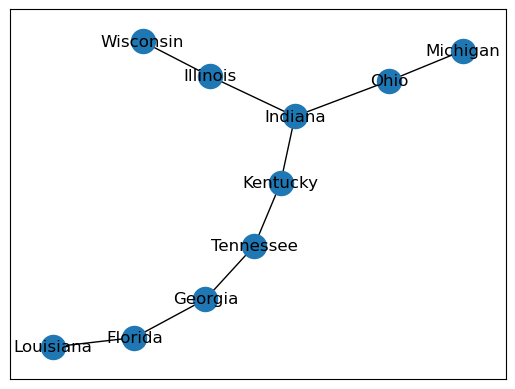

In [476]:
Cluster1_Graph = nx.from_pandas_edgelist(cluster_network1, 0, 'b', edge_attr='Distance')
Cluster1_Graph = nx.minimum_spanning_tree(Cluster1_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster1_Graph,with_labels=True)
print(Cluster1_Graph)

In [477]:
list2 = cluster2.index.tolist()


In [478]:
#use the huge network to create clusters based on the nodes in the cluster
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list2 or huge_network2.iloc[i,1] not in list2:
        l2.append(i)

In [479]:
cluster_network2 = huge_network2.copy()

In [480]:
cluster_network2.drop(cluster_network2.index[l2], inplace=True)

Graph with 9 nodes and 8 edges


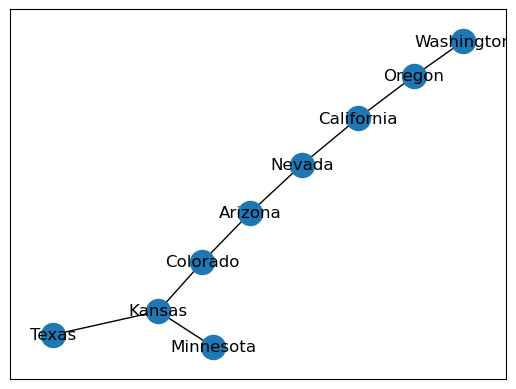

In [481]:
Cluster2_Graph = nx.from_pandas_edgelist(cluster_network2, 0, 'b', edge_attr='Distance')
Cluster2_Graph = nx.minimum_spanning_tree(Cluster2_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster2_Graph,with_labels=True)
print(Cluster2_Graph)

In [482]:
list3 = cluster3.index.tolist()

In [483]:
#use the huge network to create clusters based on the nodes in the cluster
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list3 or huge_network2.iloc[i,1] not in list3:
        l2.append(i)

In [484]:
cluster_network3 = huge_network2.copy()

In [485]:
cluster_network3.drop(cluster_network3.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


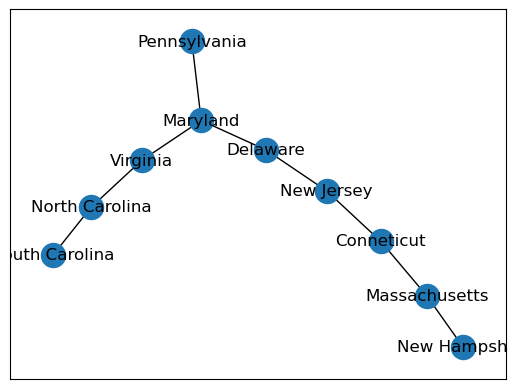

In [486]:
Cluster3_Graph = nx.from_pandas_edgelist(cluster_network3, 0, 'b', edge_attr='Distance')
Cluster3_Graph = nx.minimum_spanning_tree(Cluster3_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster3_Graph,with_labels=True)
print(Cluster3_Graph)

In [487]:
#get criteria for the clusters
def metrics_cluster1(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    global b4
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    b4 = pd.concat([b1, b2, b3])
    average_shortest_path = b4['Shortest_path_to_production_facility'].sum() / len(b4) - 3
    display(b4)
    print("Average shortest path:", average_shortest_path)
    
    g1 = shortest_path_product1(graph1,location1,weight,demand)
    g2 = shortest_path_product1(graph2,location2,weight,demand)
    g3 = shortest_path_product1(graph3,location3,weight,demand)
    g4 = pd.concat([g1, g2, g3])
    average_shortest_product_path = g4['Total_distance'].sum()/g4['Warehouse_size'].sum()
    display(g4)
    print('Average shortest path per product:', average_shortest_product_path)
    
    c1 = cost_function(graph1, location1, weight, demand)
    c2 = cost_function(graph2, location2, weight, demand)
    c3 = cost_function(graph3, location3, weight, demand)
    c4 = pd.concat([c1, c2, c3])
    print("Trucks needed:")
    display(c4)
    print('Price trucks:')
    total_costs_trucks = c4['Combined_costs_total_trucks'].sum()
    display(total_costs_trucks)
    

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE LOUISIANA

In [489]:
#criteria clusters with Louisiana as production node
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["California"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 2300000


metrics_cluster1(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Louisiana','Nevada','New Jersey')

,State,Shortest_path_to_production_facility
9,Wisconsin,1831.3
8,Michigan,1769.4
7,Illinois,1557.6
6,Ohio,1525.8
5,Indiana,1343.2
4,Kentucky,1176.3
3,Tennessee,967.8
2,Georgia,721.2
1,Florida,444.8
8,Texas,2790.8


Average shortest path: 986.1846153846153


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,Wisconsin,1831.3,1100000,2014430000.0
8,Michigan,1769.4,1000000,1769400000.0
7,Illinois,1557.6,6012000,9364291200.000002
6,Ohio,1525.8,1855000,2830359000.0
5,Indiana,1343.2,5450000,7320440000.000002
4,Kentucky,1176.3,5145000,6052063500.000001
3,Tennessee,967.8,3680000,3561504000.0
2,Georgia,721.2,1385000,998862000.0
1,Florida,444.8,4890000,2175072000.0
8,Texas,2790.8,8834000,24653927200.0


Average shortest path per product: 947.9201182819422
Trucks needed:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
9,Wisconsin,1831.3,1100000,2014430000.0,7,12819.1,5017.762,873.389231,5891.151231,41238.058615
8,Michigan,1769.4,1000000,1769400000.0,6,10616.4,4848.156,843.867692,5692.023692,34152.142154
7,Illinois,1557.6,6012000,9364291200.000002,36,56073.6,4267.824,742.855385,5010.679385,180384.457846
6,Ohio,1525.8,1855000,2830359000.0,11,16783.8,4180.692,727.689231,4908.381231,53992.193538
5,Indiana,1343.2,5450000,7320440000.000002,33,44325.6,3680.368,640.603077,4320.971077,142592.045538
4,Kentucky,1176.3,5145000,6052063500.000001,31,36465.3,3223.062,561.004615,3784.066615,117306.065077
3,Tennessee,967.8,3680000,3561504000.0,22,21291.6,2651.772,461.566154,3113.338154,68493.439385
2,Georgia,721.2,1385000,998862000.0,9,6490.8,1976.088,343.956923,2320.044923,20880.404308
1,Florida,444.8,4890000,2175072000.0,29,12899.2,1218.752,212.135385,1430.887385,41495.734154
8,Texas,2790.8,8834000,24653927200.0,53,147912.4,7646.792,1330.996923,8977.788923,475822.812923


Price trucks:


1758569.9247692311

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE KENTUCKY

In [490]:
#criteria clusters with Kentucky as production node
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 3680000
metrics_cluster1(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Tennessee','Nevada','New Jersey')

,State,Shortest_path_to_production_facility
9,Louisiana,967.8
8,Wisconsin,863.5
7,Michigan,801.6
6,Illinois,589.8
5,Ohio,558.0
4,Florida,523.0
3,Indiana,375.4
2,Georgia,246.6
1,Kentucky,208.5
8,Texas,2790.8


Average shortest path: 747.5999999999999


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,Louisiana,967.8,3680000,3561504000.0
8,Wisconsin,863.5,1100000,949850000.0
7,Michigan,801.6,1000000,801600000.0
6,Illinois,589.8,6012000,3545877600.0
5,Ohio,558.0,1855000,1035090000.0
4,Florida,523.0,4890000,2557470000.0
3,Indiana,375.4,5450000,2045930000.0
2,Georgia,246.6,1385000,341541000.0
1,Kentucky,208.5,5145000,1072732500.0
8,Texas,2790.8,8834000,24653927200.0


Average shortest path per product: 736.9655855175723
Trucks needed:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
9,Louisiana,967.8,3680000,3561504000.0,22,21291.6,2651.772,461.566154,3113.338154,68493.439385
8,Wisconsin,863.5,1100000,949850000.0,7,6044.5,2365.99,411.823077,2777.813077,19444.691538
7,Michigan,801.6,1000000,801600000.0,6,4809.6,2196.384,382.301538,2578.685538,15472.113231
6,Illinois,589.8,6012000,3545877600.0,36,21232.8,1616.052,281.289231,1897.341231,68304.284308
5,Ohio,558.0,1855000,1035090000.0,11,6138.0,1528.92,266.123077,1795.043077,19745.473846
4,Florida,523.0,4890000,2557470000.0,29,15167.0,1433.02,249.430769,1682.450769,48791.072308
3,Indiana,375.4,5450000,2045930000.0,33,12388.2,1028.596,179.036923,1207.632923,39851.886462
2,Georgia,246.6,1385000,341541000.0,9,2219.4,675.684,117.609231,793.293231,7139.639077
1,Kentucky,208.5,5145000,1072732500.0,31,6463.5,571.29,99.438462,670.728462,20792.582308
8,Texas,2790.8,8834000,24653927200.0,53,147912.4,7646.792,1330.996923,8977.788923,475822.812923


Price trucks:


1366070.5666153848

In [491]:
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000